<a href="https://colab.research.google.com/github/JiHoonPark96/practice/blob/main/SciPy_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Data and Fitting to Distributions


In this notebook, we will demonstrate how to generate data from known distributions, and how to fit distributions to data using [SciPy](https://www.scipy.org/).  

You can find the full list of distributions available in SciPy using these links:
* [Discrete Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)
* [Continuous Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
* [Multivariate Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions)




This notebook does the following:

> 1. Generates data from a variety of distributions using the `scipy.stats.{distribution}.rvs()` method.<br>

> 2. Fits the generated data to a Gaussian distribution using the `scipy.stats.norm.fit()` method.<br>

> 3. Assumes the generated data was drawn from the correct distribution type and learns the distribution parameters using<br> the `scipy.stats.{distribution}.fit()` method.

In [ ]:
# import libraries
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, kstest
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# suppress warnings (not generally recommended, but fine here)
import warnings
warnings.filterwarnings("ignore")


# plot within the notebook
%matplotlib inline


# some plotting configurations
matplotlib.rcParams['figure.figsize'] = (16.0, 14.0)
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 16})

## Define a set of distributions from which we will draw i.i.d. samples.
Feel free to add your own!

In [ ]:
# Distributions from which to generate data, shape constants were taken
# from the examples on the scipy.stats distribution documentation pages.

DISTRIBUTIONS = [
    stats.beta(a=2, b=5),
    stats.chi2(df=3, loc=0.0, scale=1.0),
    stats.cosine(loc=0.0, scale=1.0),
    stats.exponnorm(K=1.5, loc=0.0, scale=1.0),
    stats.exponpow(b=3, loc=0.0, scale=1.0),
    stats.gennorm(beta=1.3, loc=0.0, scale=1.0),
    stats.gamma(a=1.99, loc=0.0, scale=1.0),
    stats.invgamma(a=4.07, loc=0.0, scale=1.0),
    stats.invgauss(mu=0.15, loc=0.0, scale=1.0),
    stats.logistic(loc=0.0, scale=1.0),
    stats.norm(loc=0.0, scale=1.0),
    stats.triang(c=0.158, loc=0.0, scale=1.0),
    stats.uniform(loc=0.0, scale=1.0),
]

## Generate data from known distributions

In [ ]:
ddata = []

# number of data points
size = 500

for distribution in DISTRIBUTIONS:

    try:
        # Generate i.i.d. data
        rv = pd.Series(distribution.rvs(size=size))

        # Distribution name and parameter string
        title = '{} ({})'.format(distribution.dist.name.capitalize(), ', '.join(['{}={:0.2f}'.format(k,v)
                                                                   for k,v in distribution.kwds.items()]))

        # Store data as a dictionary
        ddata.append({'rv':rv, 'distribution':distribution, 'title':title})

    except Exception as e:
        print('could not create data', distribution.dist.name)
        print(e)

## Plot data histogram with true distribution

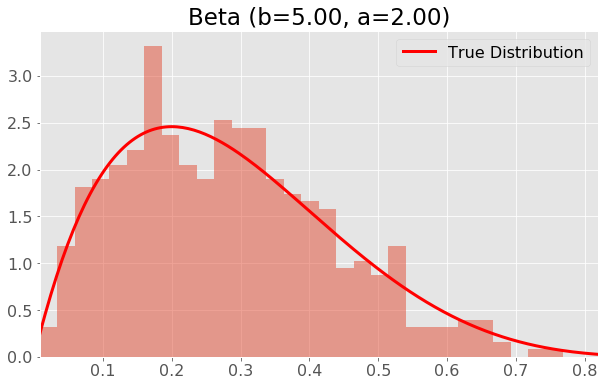

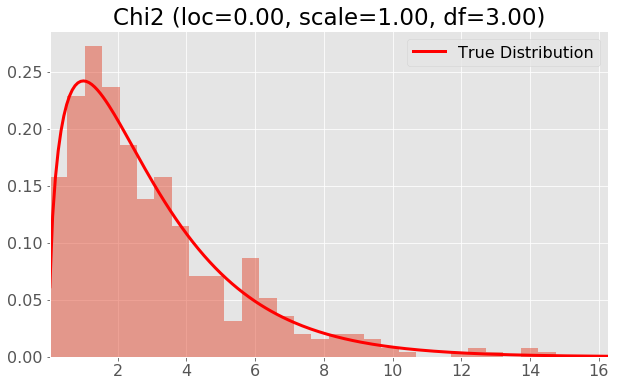

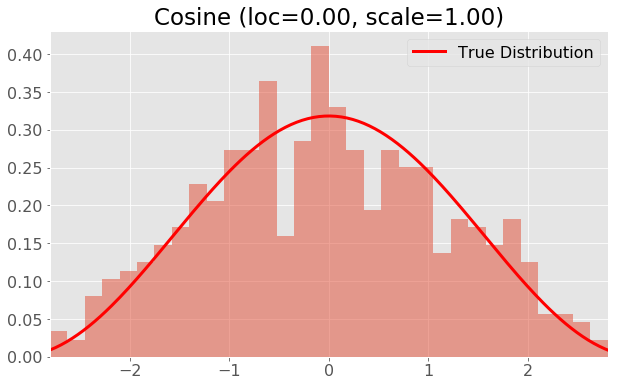

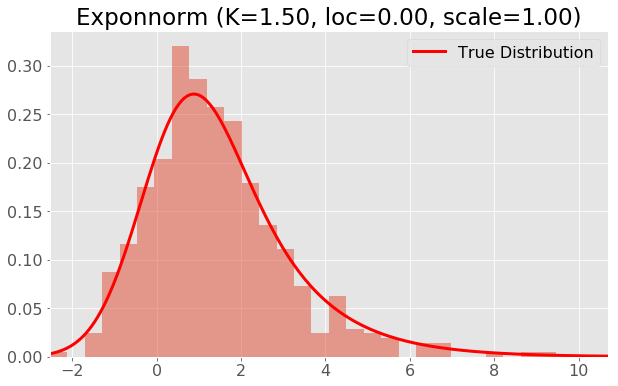

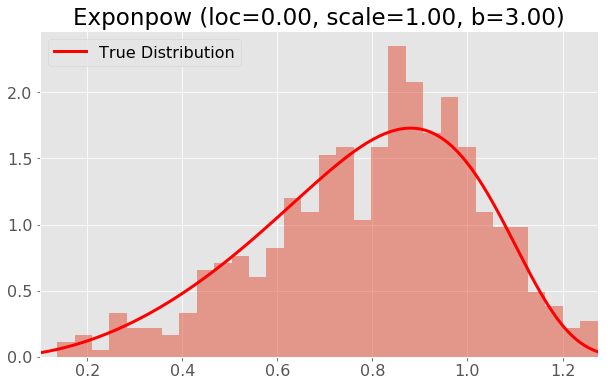

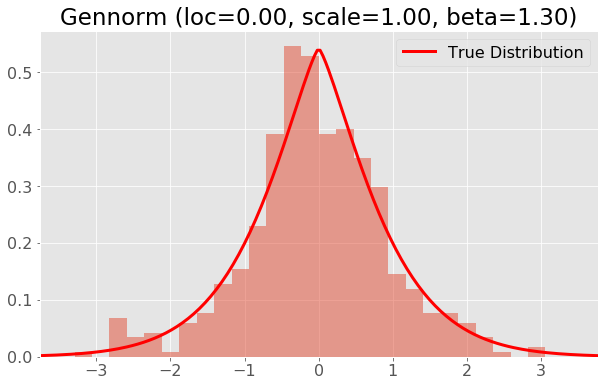

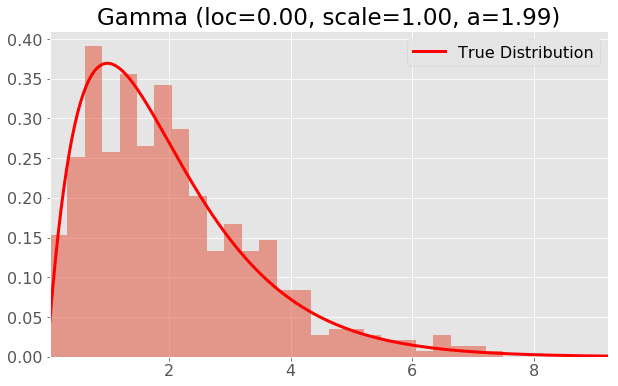

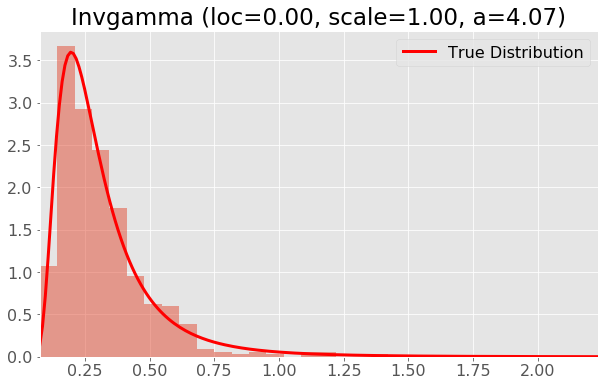

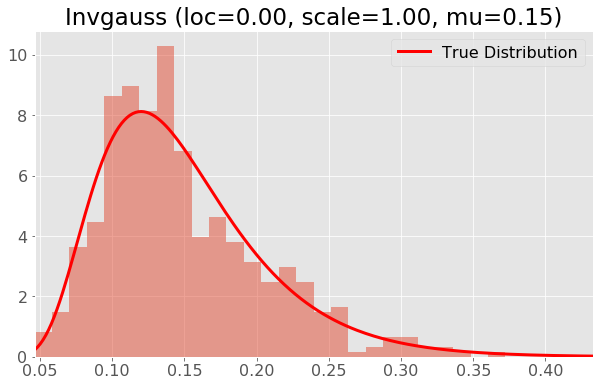

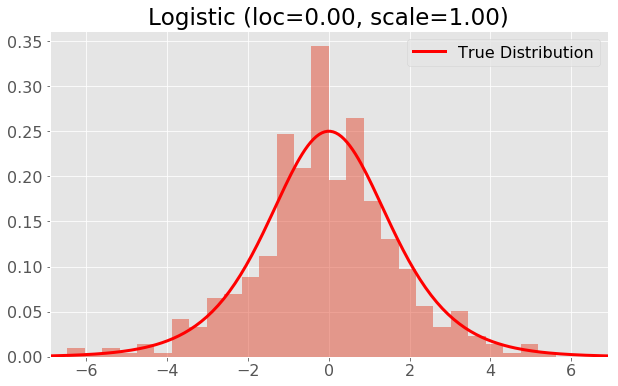

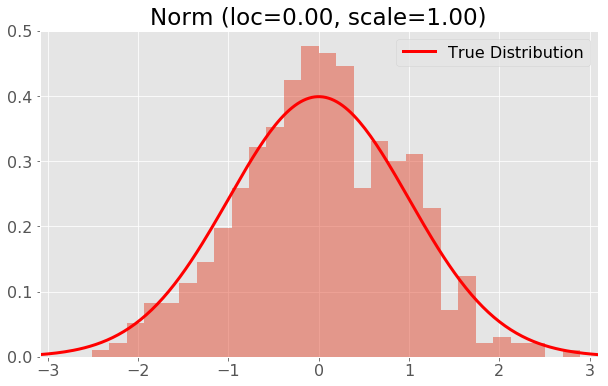

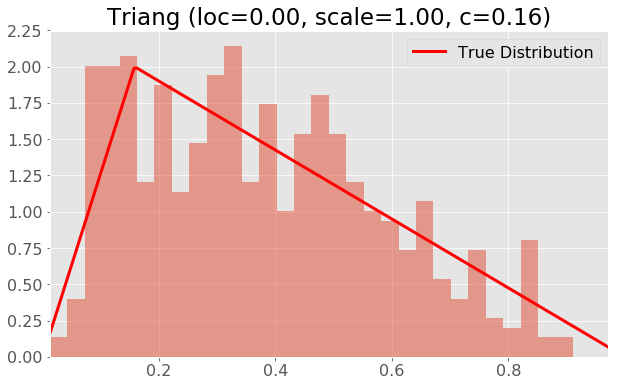

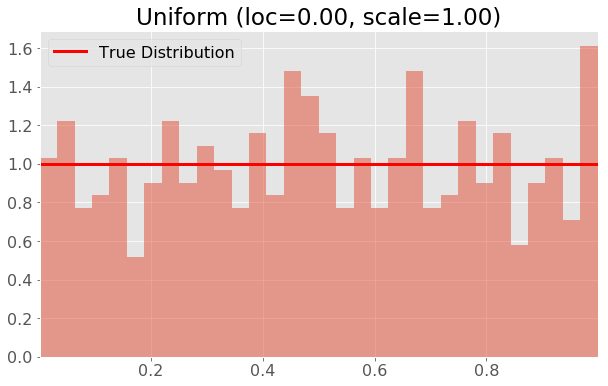

In [ ]:
# number of histogram bins
bins = 32

for d in ddata:
    try:

        distribution = d['distribution']

        # Get reasonable start and end points of distribution
        d['start'] = distribution.ppf(0.001)
        d['end'] = distribution.ppf(0.999)

        # Build PDF of the true distribution
        d['x'] = np.linspace(d['start'], d['end'], 200)
        y = distribution.pdf(d['x'])
        d['pdf'] = pd.Series(y, d['x'])

        # Plot
        plt.figure(figsize=(10, 6))
        plt.hist(d['rv'],bins=np.linspace(d['start'], d['end'], bins+1),normed=True, alpha=0.5)
        ax = d['pdf'].plot(kind='line', label='True Distribution', legend=True, lw=3, color='r')
        ax.set_title(d['title'])
        plt.show()

    except Exception as e:
        print('could not create and/or plot data', distribution.dist.name)
        print(e)


## Fit data to Gaussian distributions

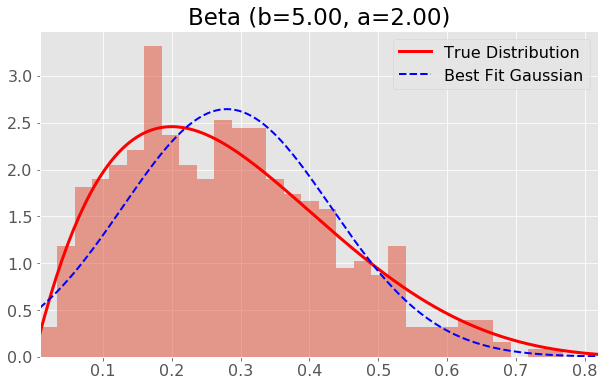

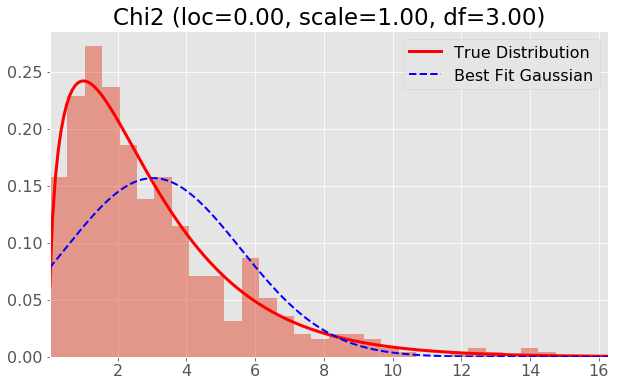

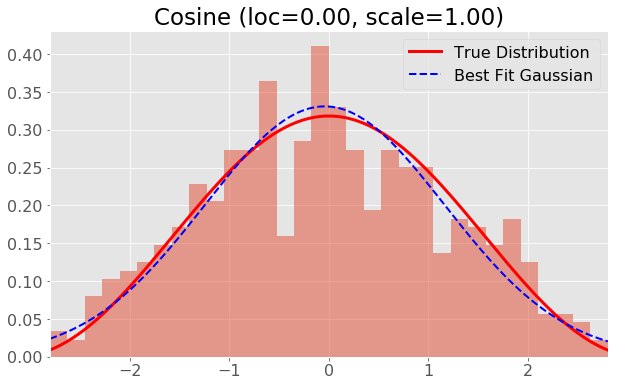

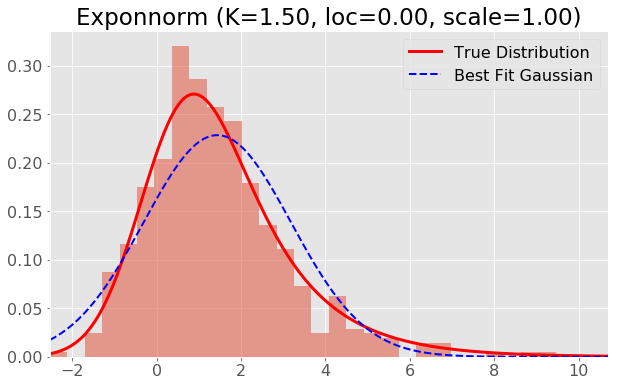

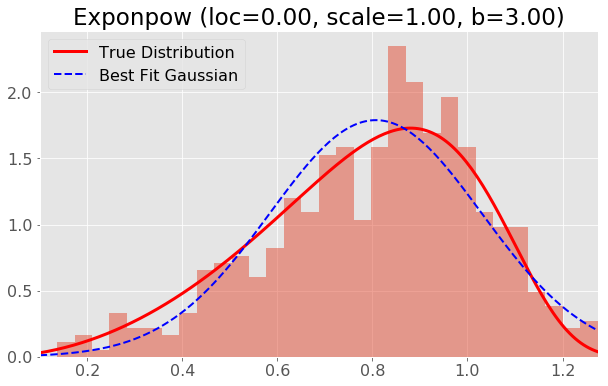

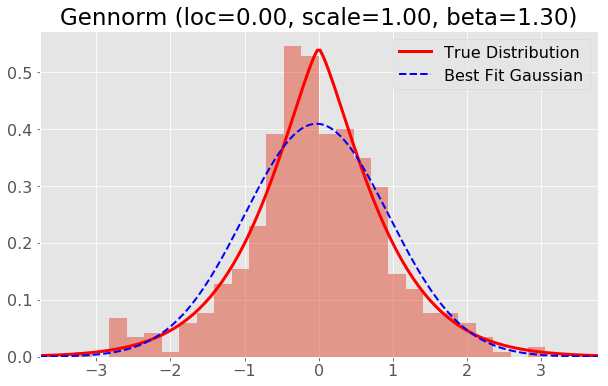

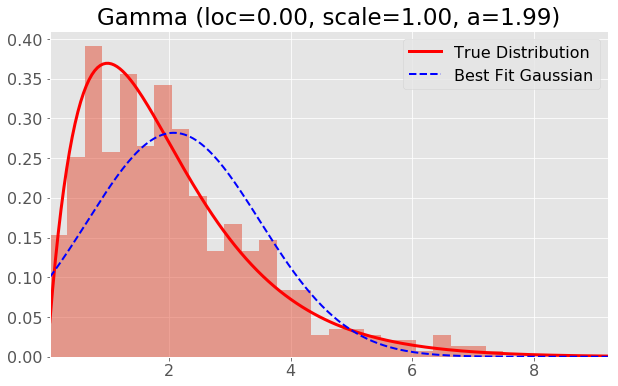

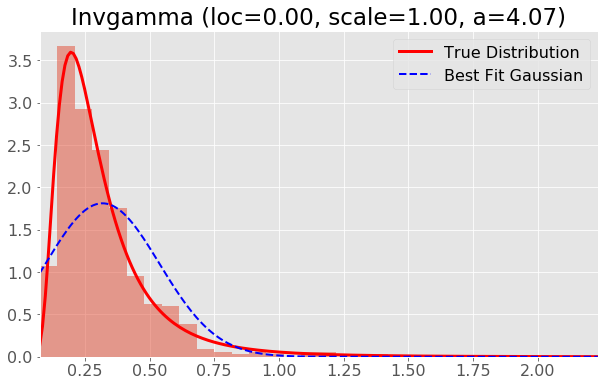

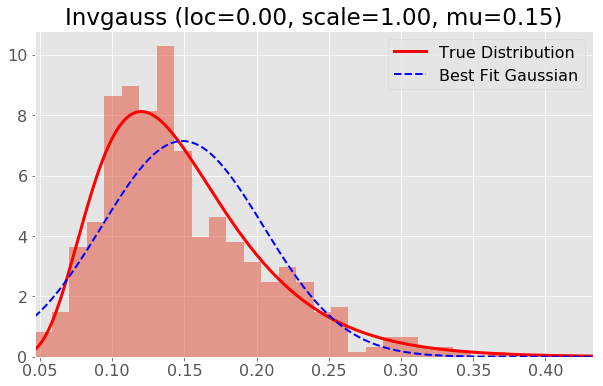

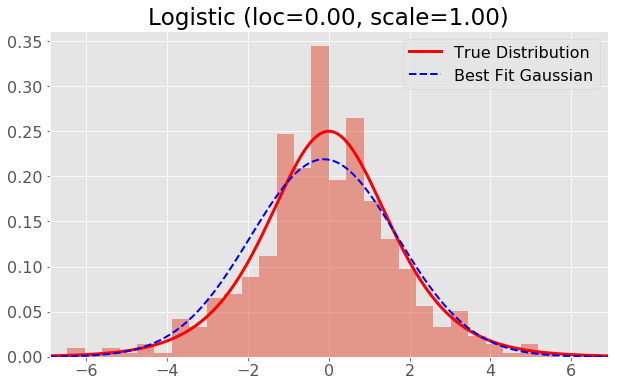

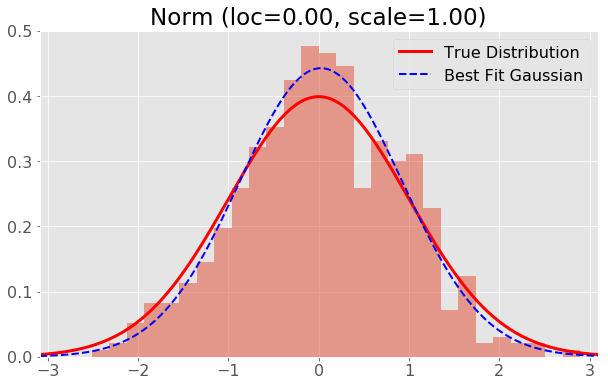

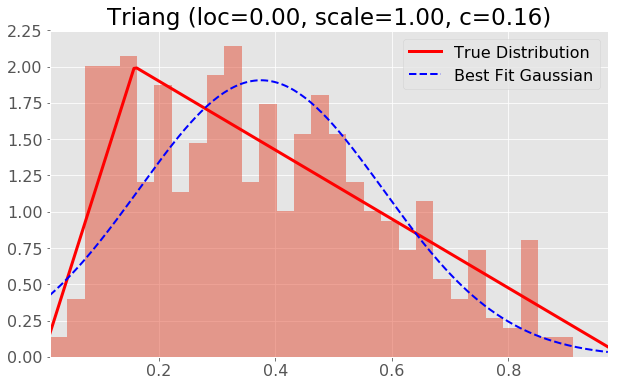

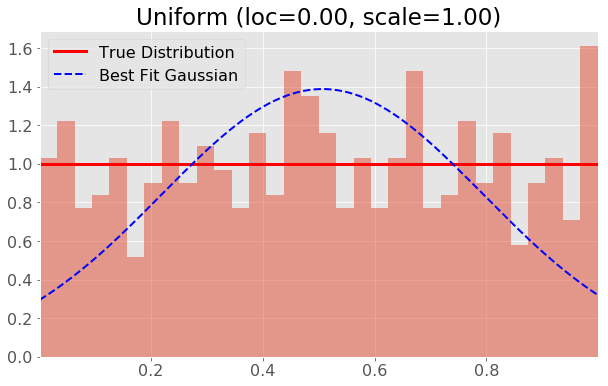

In [ ]:
for d in ddata:
    try:
        distribution = d['distribution']

        # Fit a normal distribution to the data
        mu, std = stats.norm.fit(d['rv'])
        ynorm = stats.norm.pdf(d['x'], mu, std)
        d['pdfnorm'] = pd.Series(ynorm, d['x'])

        # Plot
        plt.figure(figsize=(10, 6))
        plt.hist(d['rv'],bins=np.linspace(d['start'], d['end'], bins+1),normed=True, alpha=0.5)
        ax = d['pdf'].plot(kind='line', label='True Distribution', legend=True, lw=3, color='r')
        ax = d['pdfnorm'].plot(kind='line', label='Best Fit Gaussian', legend=True, lw=2, color='b',style='--')

        ax.set_title(d['title'])
        plt.show()


    except Exception as e:
        print('could not create and/or plot data', distribution.dist.name)
        print(e)


## Fit data to correct distribution type

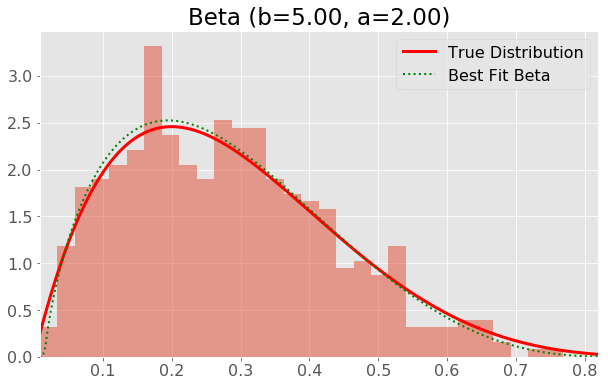

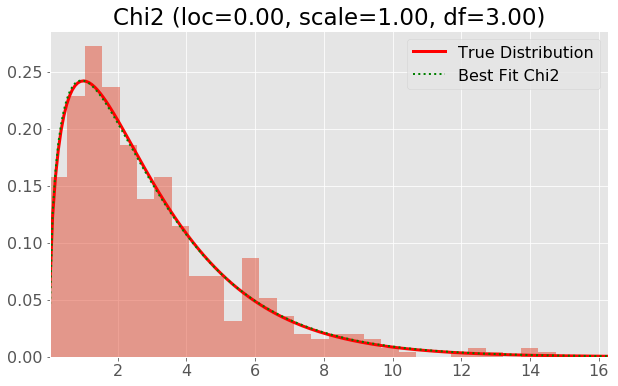

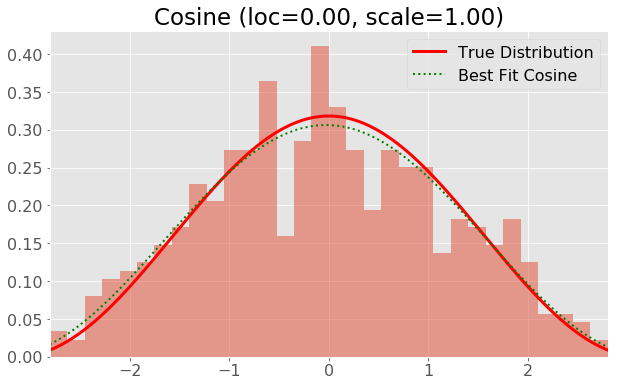

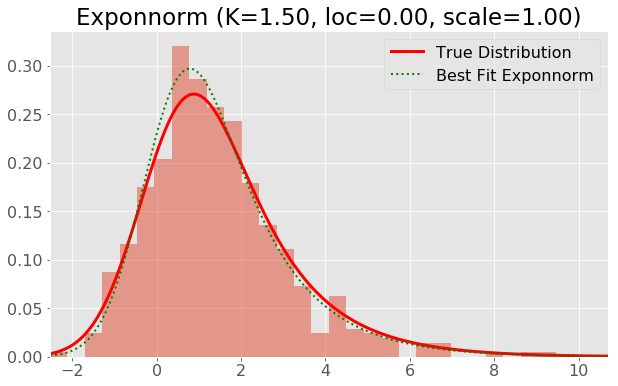

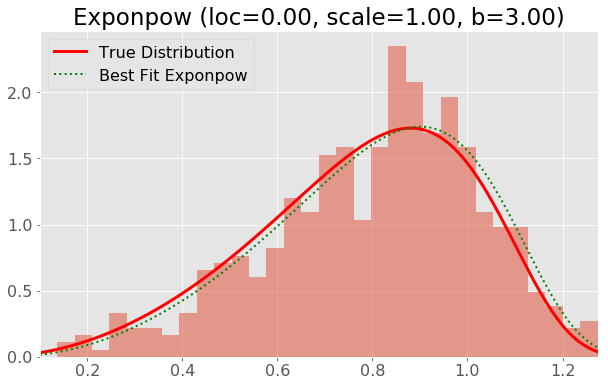

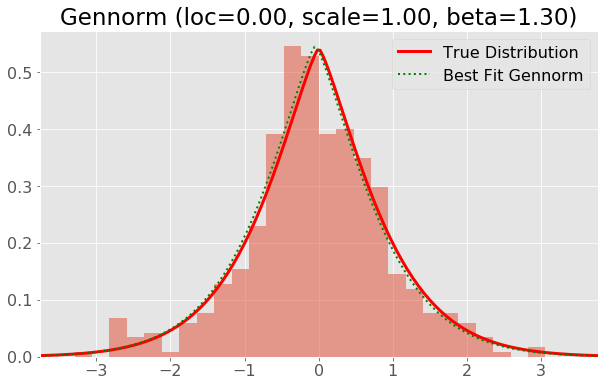

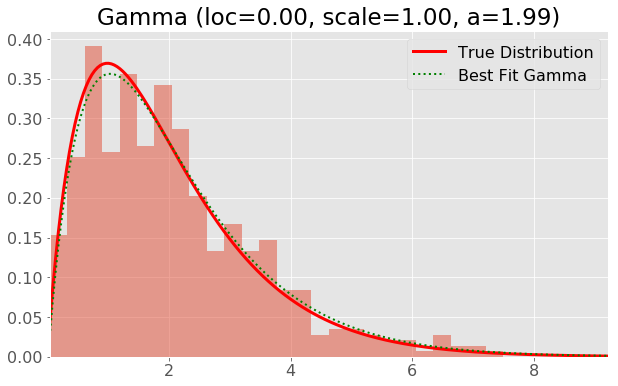

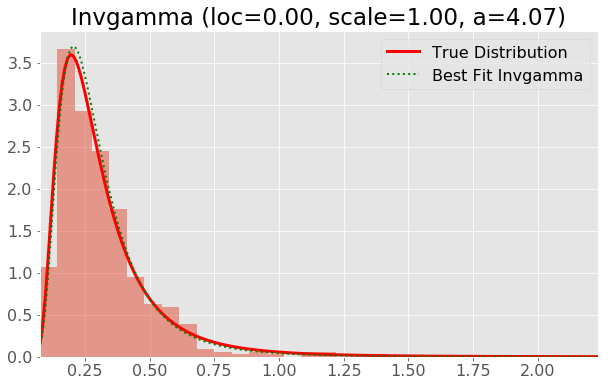

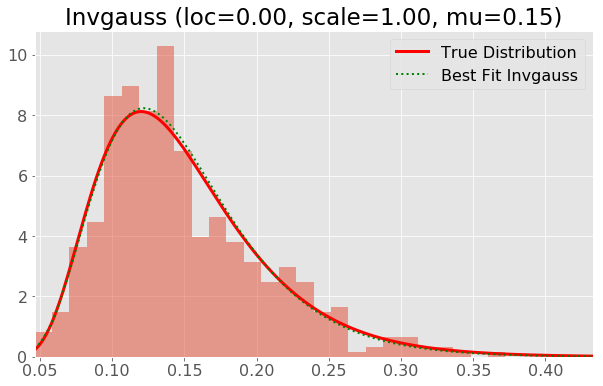

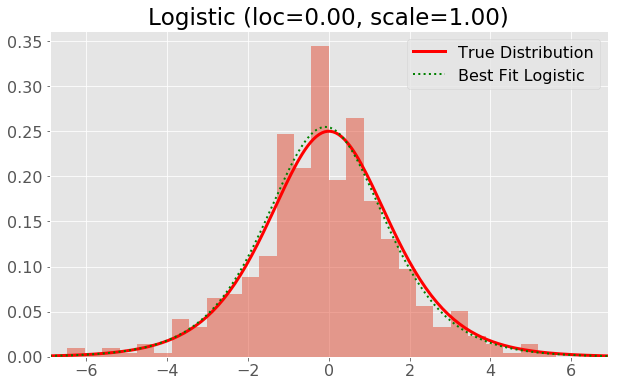

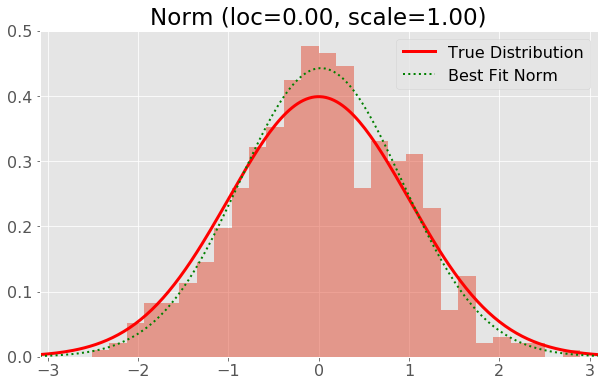

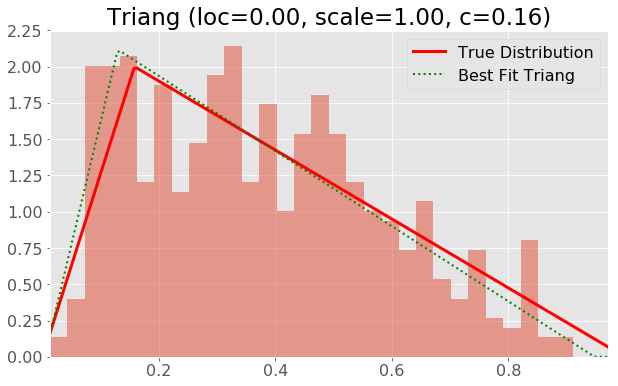

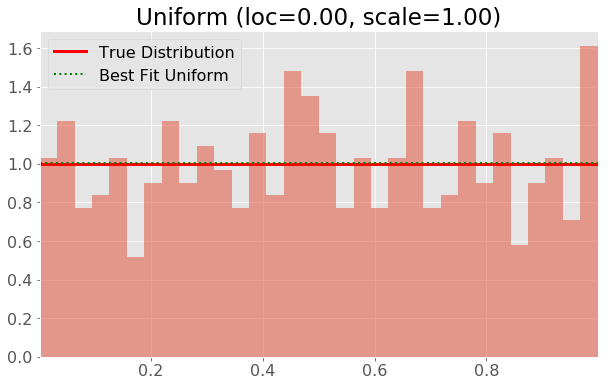

In [ ]:
for d in ddata:
    try:
        distribution = d['distribution']

        # Using correct distribution function, fit parameters to data
        b=distribution.dist.fit(d['rv'])
        ydist = distribution.dist.pdf(d['x'], *b)
        d['pdfdist'] = pd.Series(ydist, d['x'])

        # Plot
        plt.figure(figsize=(10, 6))
        plt.hist(d['rv'],bins=np.linspace(d['start'], d['end'], bins+1),normed=True, alpha=0.5)
        ax = d['pdf'].plot(kind='line', label='True Distribution', legend=True, lw=3, color='r')
        ax = d['pdfdist'].plot(kind='line', label='Best Fit {}'.format(distribution.dist.name.capitalize()), legend=True, lw=2, color='g',style=':')

        ax.set_title(d['title'])
        plt.show()


    except Exception as e:
        print('could not create and/or plot data', distribution.dist.name)
        print(e)
